In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
try:
    import torchbearer
except:
    !pip install -q torchbearer
    import torchbearer
    !pip install livelossplot
print(torchbearer.__version__)


In [ ]:
#!wget http://chaladze.com/l5/img/Linnaeus%205%20128X128.rar

In [ ]:
# !unrar x -y "/content/Linnaeus 5 128X128.rar" "/content/drive/MyDrive/Linnaeus"

In [ ]:
import os
os.listdir('/content/drive/MyDrive/ANN-HW4/Linnaeus5/train')

['berry', 'bird', 'dog', 'flower', 'other']

In [ ]:
pic_selected = sorted(os.listdir("/content/drive/MyDrive/ANN-HW4/Linnaeus5/train"))
pic_selected

['berry', 'bird', 'dog', 'flower', 'other']

In [ ]:
data_dir="/content/drive/MyDrive/ANN-HW4/Linnaeus5/train"

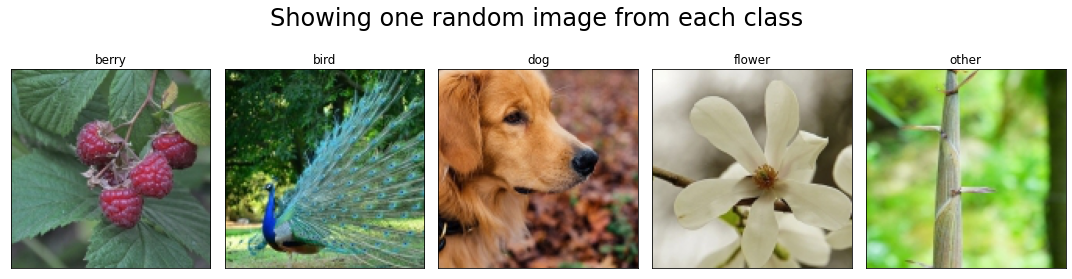

In [ ]:
import numpy as np
import cv2  
import matplotlib.pyplot as plt
import matplotlib.image as img

rows = 1
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
fig.suptitle("Showing one random image from each class", y=0.65, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
counter=0
data=[]
label=[]
for pic_id in pic_selected:
  counter=pic_selected.index(pic_id)
  pic_selected_images = os.listdir(os.path.join(data_dir,pic_id))
  for id in pic_selected_images:
    data.append(plt.imread(os.path.join(data_dir,pic_id, id),cv2.IMREAD_COLOR))
    label.append(counter)

  pic_selected_random = np.random.choice(pic_selected_images) 
  imgs = plt.imread(os.path.join(data_dir,pic_id, pic_selected_random))
  ax[counter].imshow(imgs)
  ax[counter].set_title(pic_id, pad = 5)
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
    

In [ ]:
dataset=np.array(data)
labels=np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(dataset, labels, test_size=0.2, random_state=1)

In [ ]:
X_train=X_train/256
X_eval=X_eval/256

NameError: ignored

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_eval = to_categorical(y_eval, num_classes=5)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Input, BatchNormalization, LeakyReLU, GlobalMaxPooling2D
from keras.regularizers import l1_l2

model = Sequential()

model.add(Conv2D(128,kernel_size=3,strides=1,input_shape=(128,128,3)))
model.add(LeakyReLU(alpha=0.02))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,kernel_size=3,strides=1,input_shape=(128,128,3)))
model.add(LeakyReLU(alpha=0.02))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPooling2D())

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.02))
model.add(Dropout(0.2))
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 126, 126, 128)     0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 61, 61, 128)       0         
                                                      

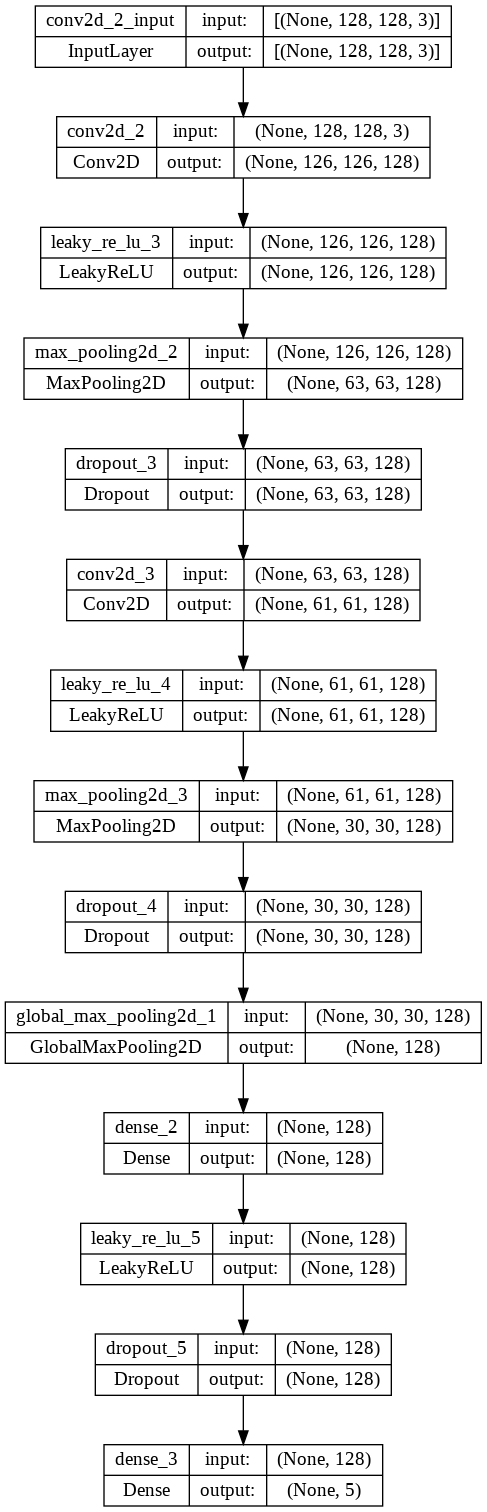

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

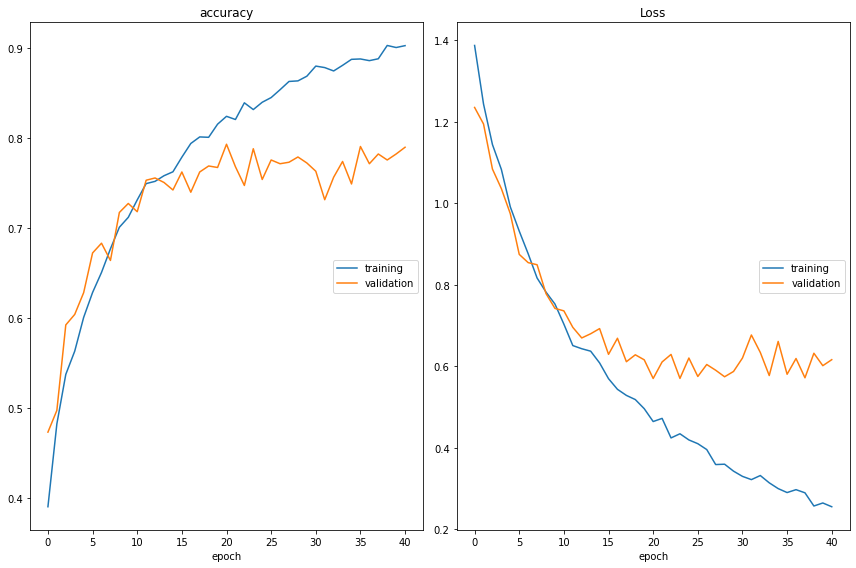

accuracy
	training         	 (min:    0.390, max:    0.903, cur:    0.903)
	validation       	 (min:    0.473, max:    0.793, cur:    0.790)
Loss
	training         	 (min:    0.256, max:    1.387, cur:    0.256)
	validation       	 (min:    0.570, max:    1.235, cur:    0.616)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

n_epochs = 60

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(X_train, y_train,batch_size=20,shuffle=True,
                    epochs=n_epochs, 
                    validation_data=(X_eval,y_eval),
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [ ]:
W = model.get_layer(name='conv2d').get_weights()[0]


In [ ]:
W.shape

(3, 3, 3, 128)

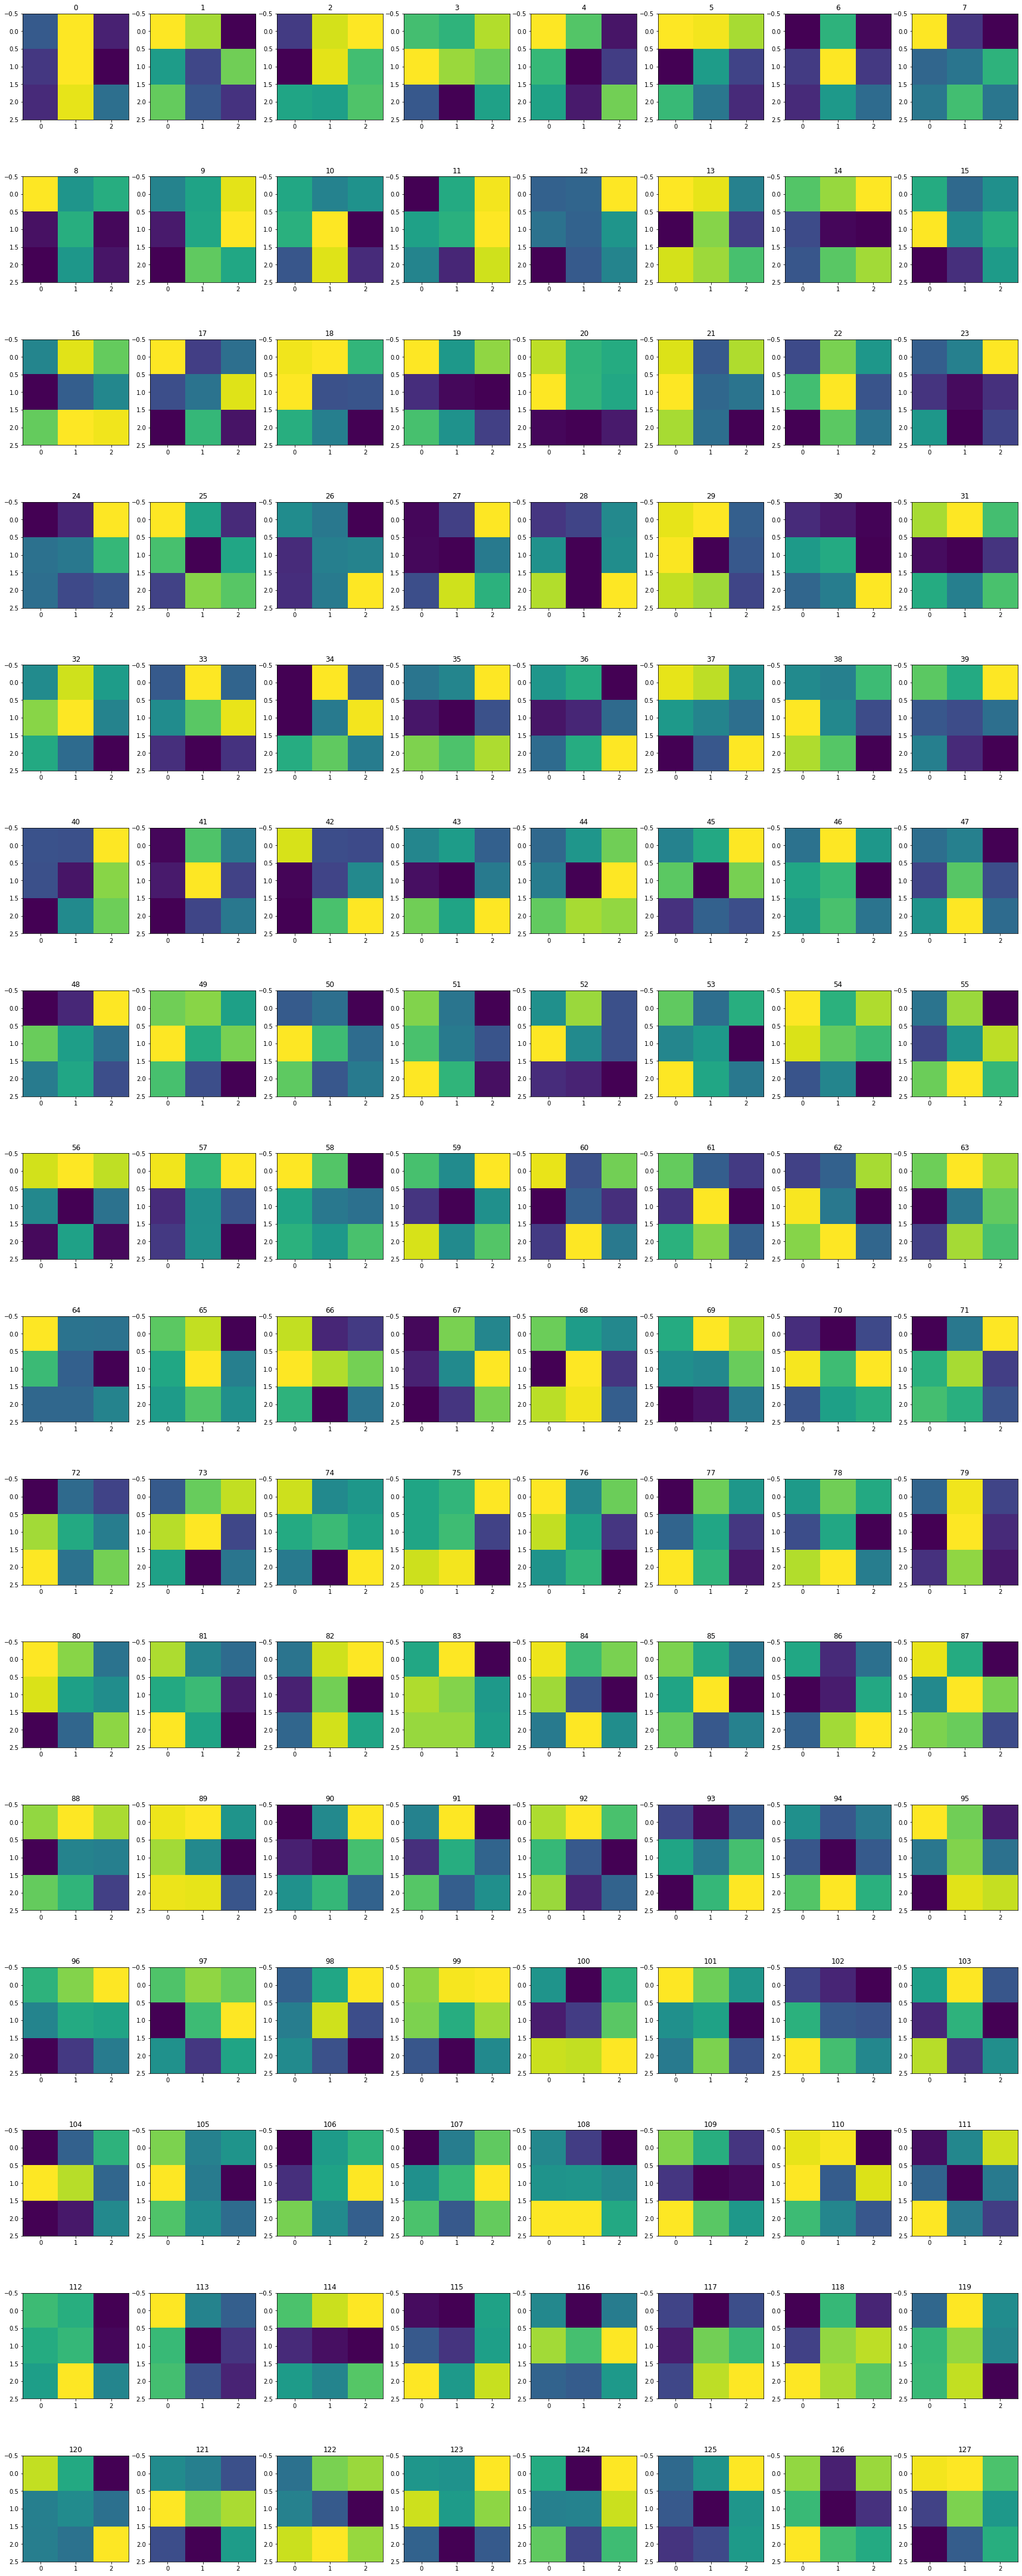

In [ ]:
if len(W.shape) == 4:
  W = np.squeeze(W)
  W1 = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
  fig, axs = plt.subplots(16,8, figsize=(80,80))
  fig.subplots_adjust(hspace = .1, left=0.01, right=0.3)
  axs = axs.ravel()
  for i in range(128):
    axs[i].imshow(W1[:,:,i])
    axs[i].set_title(str(i))

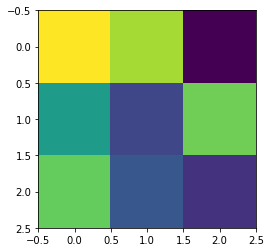

In [ ]:
plt.imshow(W[:,:,1])

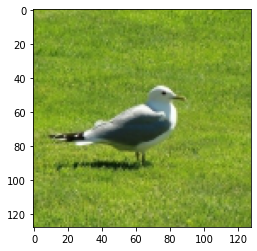

In [ ]:
plt.imshow(X_train[0])

In [ ]:

model = tf.keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)


In [ ]:
sample=np.reshape(X_train[0],(-1,128,128,3))

In [ ]:
from matplotlib import pyplot
from numpy import expand_dims

features = model.predict(sample)



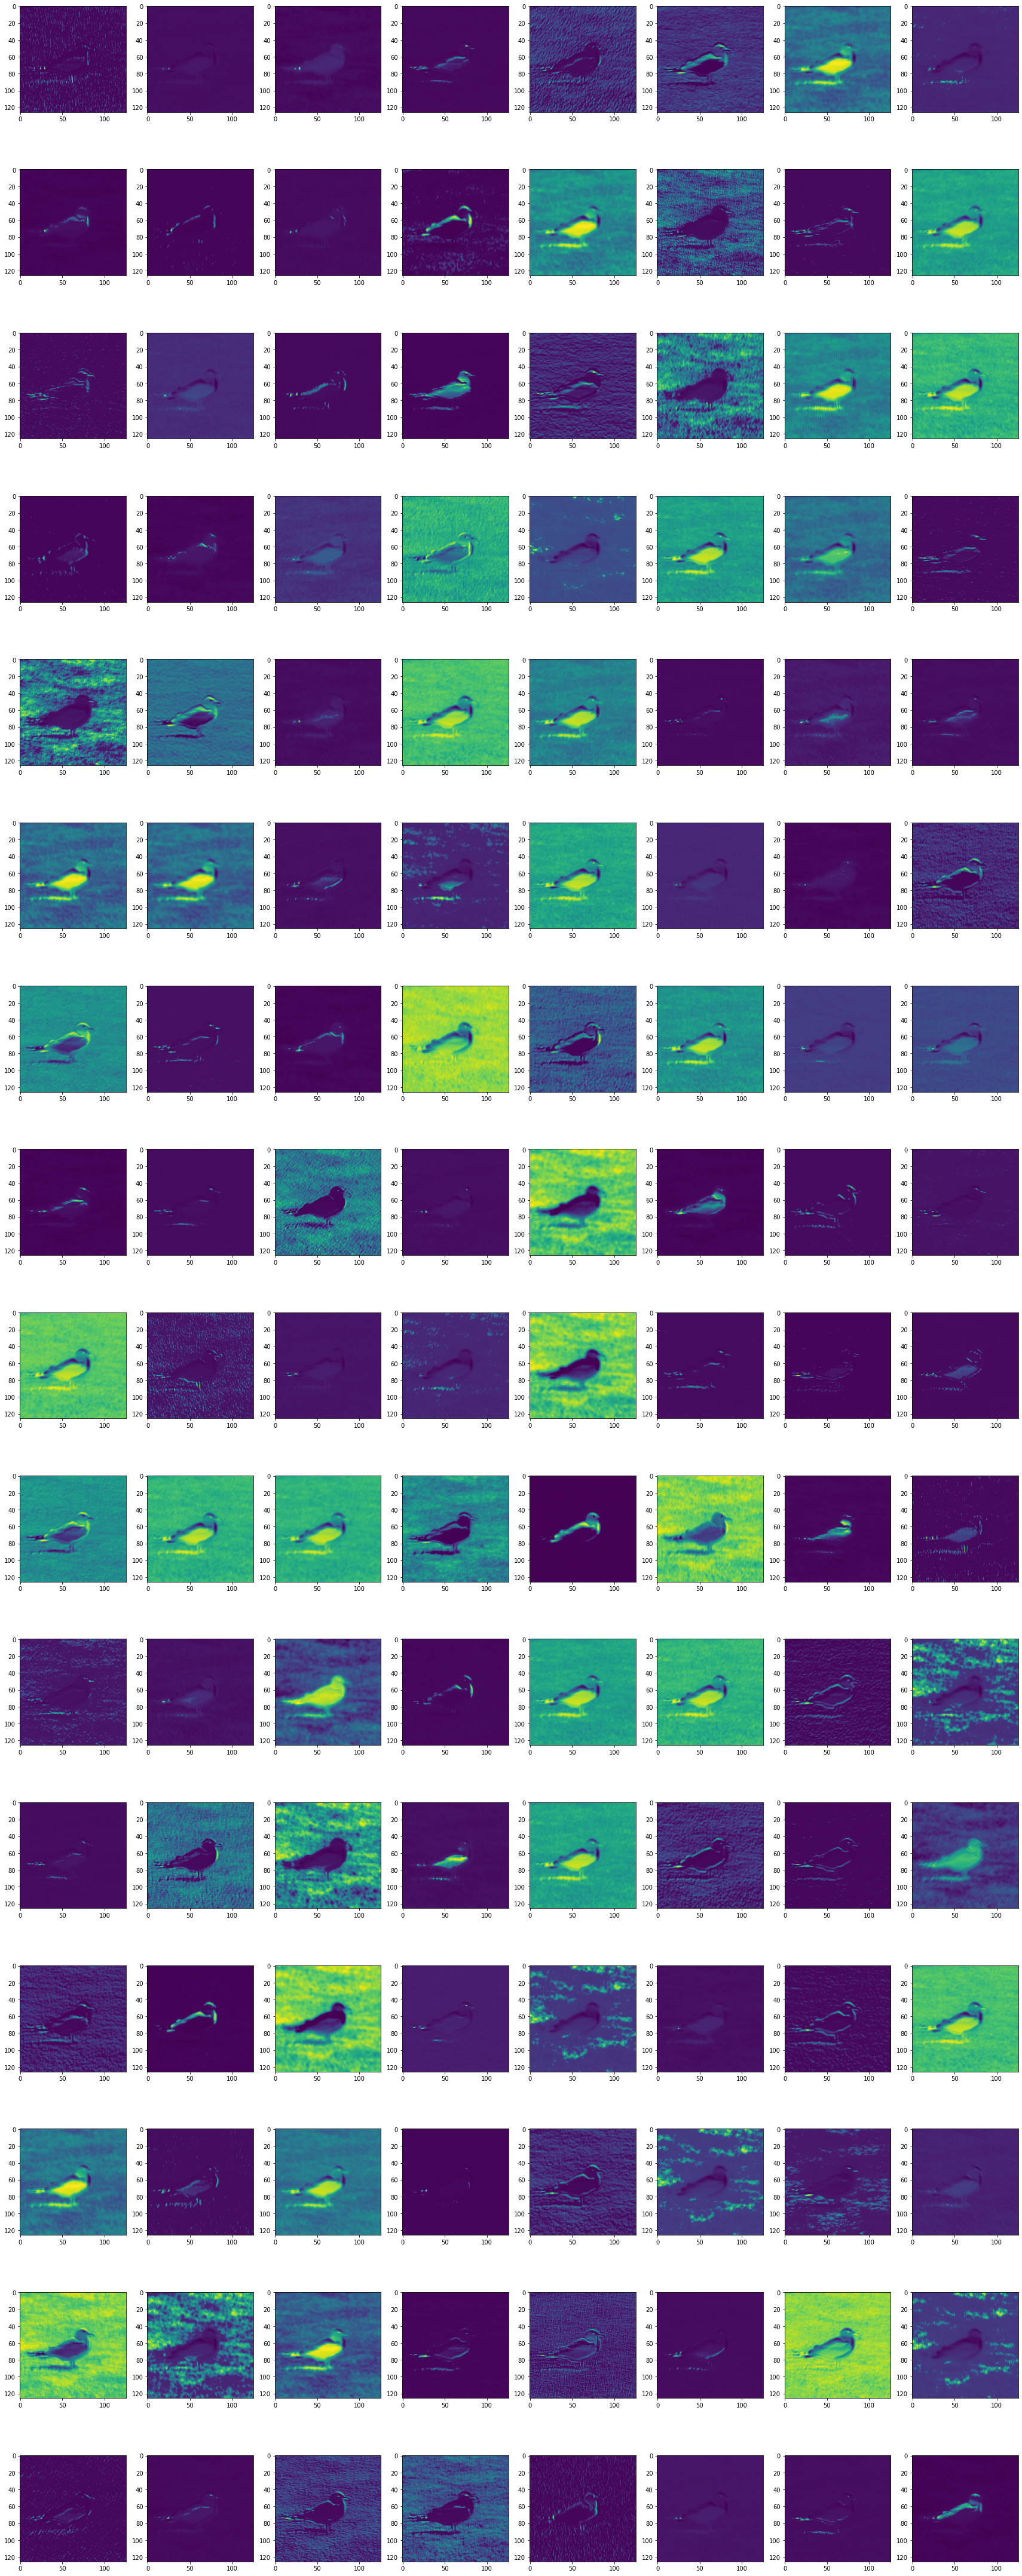

In [ ]:
fig = pyplot.figure(figsize=(80,80))
fig.subplots_adjust(hspace = .1, left=0.01, right=0.3)
for i in range(1,features.shape[3]+1):

    pyplot.subplot(16,8,i)
    pyplot.imshow(features[0,:,:,i-1])
    
pyplot.show()

In [ ]:
model.summary()

In [ ]:
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Input, BatchNormalization, Add
from keras.regularizers import l1_l2

inp=Input(shape=(128,128,3), name="Input")
y=inp
#x=Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu")(inp)
x = inception_module(inp,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a1')

x=BatchNormalization()(x)

#x=Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu")(x)
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a2')

x=BatchNormalization()(x)

#skip=Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu")(inp)
skip = inception_module(inp,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a3')

x=Add()([x,skip])
x=Flatten()(x)
x=Dense(25,activation="relu")(x)
Output=Dense(5,activation="sigmoid")(x)

model = Model(inputs=inp, outputs=Output, name='test')